# Chp 3 Introduction to ML

Decision tree construction relies on recursion, where a function calls itself on smaller versions of the problem until reaching a stopping condition. For example, the factorial function can be defined recursively:

```python
𝑛! = 𝑛 × (𝑛−1)!
```

In the same way, decision trees build subtrees by applying the same process recursively on subsets of the training data, until reaching a leaf node.


In [ ]:
# Factorial


# Chp 4 Experiments with Classical Models

## Iris

The iris dataset contains four continuous features—sepal length, sepal width, petal length, and petal width—and three classes corresponding to iris species. It has 150 samples, 50 per class. Using PCA augmentation, we expand the dataset to 1,200 training samples while keeping the same test set.

len(X_train)=120, len(Y_train)=120, len(X_test)=30, len(Y_test)=30


<BarContainer object of 10 artists>

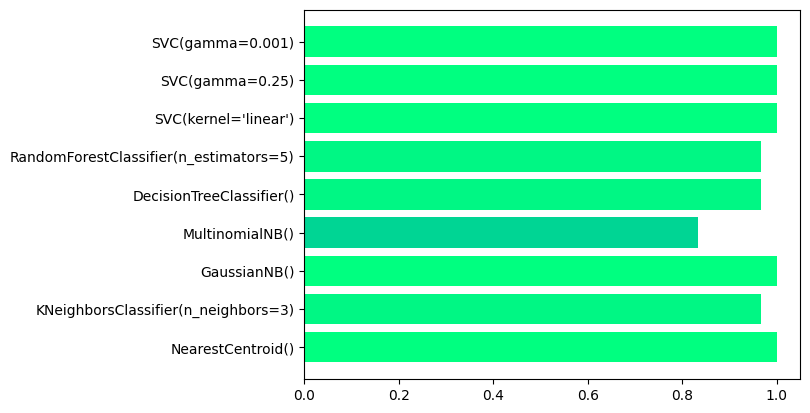

In [67]:
# Iris Experiments
import numpy as np
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt

# Load data
def load_iris_data():
    """Load and prepare the iris dataset"""
    iris = load_iris()
    X = iris['data']
    Y = iris['target']
    return X, Y



def create_augmented_data(X_train, Y_train):
    """Create augmented data by adding noise and scaling"""
    return X_train, Y_train


def run(X_train, Y_train, X_test, Y_test, clf):
    norm = MinMaxScaler().fit(X_train)
    X_train_norm = norm.transform(X_train)
    X_test_norm = norm.transform(X_test)
    
    clf.fit(X_train_norm, Y_train)
    Y_pred = clf.predict(X_test_norm)
    f1 = f1_score(Y_test, Y_pred, average='macro')
    # print(f"{f1=}")
    return repr(clf), f1.item()



def main():
    # Load iris data
    X, Y = load_iris_data()

    # Split data (120 for training, rest for testing)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=len(X) - 120, stratify=Y)
    # Create augmented data

    X_train_aug, Y_train_aug = create_augmented_data(X_train, Y_train)

    print(f"{len(X_train)=}, {len(Y_train)=}, {len(X_test)=}, {len(Y_test)=}")



    # print("Nearest centroid:")
    yield run(X_train_aug, Y_train_aug, X_test, Y_test, NearestCentroid())
    # print("k-NN classifier (k=3):")
    yield run(X_train_aug, Y_train_aug, X_test, Y_test, KNeighborsClassifier(n_neighbors=3))
    # print("Naive Bayes classifier (Gaussian):")
    yield run(X_train_aug, Y_train_aug, X_test, Y_test, GaussianNB())
    # print("Naive Bayes classifier (Multinomial):")
    yield run(X_train_aug, Y_train_aug, X_test, Y_test, MultinomialNB())
    # print("Decision tree classifier:")
    yield run(X_train_aug, Y_train_aug, X_test, Y_test, DecisionTreeClassifier())
    # print("Random forest classifier (estimators=5):")
    yield run(X_train_aug, Y_train_aug, X_test, Y_test, RandomForestClassifier(n_estimators=5))

    # print("SVM (linear, C=1.0):")
    yield run(X_train_aug, Y_train_aug, X_test, Y_test, SVC(kernel="linear", C=1.0))
    # print("SVM (RBF, C=1.0, gamma=0.25):")
    yield run(X_train_aug, Y_train_aug, X_test, Y_test, SVC(kernel="rbf", C=1.0, gamma=0.25))
    # print("SVM (RBF, C=1.0, gamma=0.001, augmented)")
    yield run(X_train_aug, Y_train_aug, X_test, Y_test, SVC(kernel="rbf", C=1.0, gamma=0.001))
    # print("SVM (RBF, C=1.0, gamma=0.001, original)")
    yield run(X_train_aug, Y_train_aug, X_test, Y_test, SVC(kernel="rbf", C=1.0, gamma=0.001))

results = list(main())
cmap = plt.get_cmap('winter')
plt.barh([x for x, _ in results], [x for _, x in results], color=[cmap(x) for _, x in results])


### Implementing a Nearest-Centroid Classifier

Even without sklearn, we can quickly implement a nearest-centroid classifier for the iris dataset. The process involves calculating the per-feature means (centroids) of each class from the training samples. This is all that is needed to "train" the model. Predictions are made by computing the Euclidean distance from each test sample to the three centroids, assigning the sample to the class with the nearest centroid.

In [169]:
a = np.array([[1, 2],[2, 5],[1, 2],[1, 2],[2, 5]])
mask = (a[:, 0, np.newaxis] == np.unique(a[:, 0])[np.newaxis, :])
(a[:, 1, np.newaxis] * mask).sum(axis=0) / mask.sum(axis=0)

array([2., 5.])

In [173]:
import numpy as np
from sklearn.datasets import load_iris

def load_iris_data():
    """Load and prepare the iris dataset"""
    iris = load_iris()
    x = iris.data
    y = iris.target
    
    # Shuffle the data to match typical train/test splits
    np.random.seed(42)  # For reproducibility
    indices = np.random.permutation(len(x))
    x = x[indices]
    y = y[indices]
    
    return x, y

def centroids(x,y):
    print(x.shape, y.shape)
    a = np.stack(x, y)
    mask = (a[:, 0, np.newaxis] == np.unique(a[:, 0])[np.newaxis, :])
    (a[:, 1, np.newaxis] * mask).sum(axis=0) / mask.sum(axis=0)

def predict(c0,c1,c2,x):
    ...

def main():
    # Load iris data using sklearn
    x, y = load_iris_data()
    
    # Split data (120 for training, rest for testing)
    N = 120
    x_train = x[:N]
    x_test = x[N:]
    y_train = y[:N]
    y_test = y[N:]
    
    # Calculate centroids and make predictions
    c0, c1, c2 = centroids(x_train, y_train)
    p = predict(c0,c1,c2, x_test)
    
    # Calculate accuracy
    nc = len(np.where(p == y_test)[0])
    nw = len(np.where(p != y_test)[0])
    acc = float(nc) / (float(nc)+float(nw))
    
    print("predicted:", p)
    print("actual   :", y_test)
    print("test accuracy = %0.4f" % acc)

if __name__ == "__main__":
    main()

(120, 4) (120,)


TypeError: only integer scalar arrays can be converted to a scalar index

## Breast Cancer

The breast cancer dataset contains 569 samples, each with 30 continuous features, including 212 malignant and 357 benign cases. Before training, we normalize the dataset by subtracting the mean and dividing by the standard deviation for each feature. Normalization ensures all features are on a similar scale, improving performance for many models.

Using an 80/20 train-test split (455 training samples and 114 test samples), we train nine classifiers: nearest centroid, k-NN, naive Bayes, decision tree, random forest (two variants), linear SVM, and RBF SVM. For the SVMs, we set the margin constant C to the default 1.0, and γ for the RBF kernel to 0.0333 (1/30).


In [ ]:
# BC experiments
import numpy as np
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

def load_breast_cancer_data():
    """Load and prepare the breast cancer dataset with standardization"""


def run(x_train, y_train, x_test, y_test, clf):


def main():
    # Load breast cancer data with standardization
    x, y = load_breast_cancer_data()
    
    # Split data (455 for training, rest for testing)
    N = 455 
    x_train = x[:N]
    x_test = x[N:]
    y_train = y[:N]
    y_test = y[N:]
    
    print(f"Dataset info: {len(x)} samples, {x.shape[1]} features")
    print(f"Training set: {len(x_train)} samples")
    print(f"Test set: {len(x_test)} samples")
    print(f"Class distribution - Training: {np.bincount(y_train)}, Test: {np.bincount(y_test)}")
    print()

    print("Nearest centroid:")
    run(x_train, y_train, x_test, y_test, NearestCentroid())
    print("k-NN classifier (k=3):")
    run(x_train, y_train, x_test, y_test, KNeighborsClassifier(n_neighbors=3))
    print("k-NN classifier (k=7):")
    run(x_train, y_train, x_test, y_test, KNeighborsClassifier(n_neighbors=7))
    print("Naive Bayes classifier (Gaussian):")
    run(x_train, y_train, x_test, y_test, GaussianNB())
    print("Decision tree classifier:")
    run(x_train, y_train, x_test, y_test, DecisionTreeClassifier())
    print("Random forest classifier (estimators=5):")
    run(x_train, y_train, x_test, y_test, RandomForestClassifier(n_estimators=5))
    print("Random forest classifier (estimators=50):")
    run(x_train, y_train, x_test, y_test, RandomForestClassifier(n_estimators=50))
    print("SVM (linear, C=1.0):")
    run(x_train, y_train, x_test, y_test, SVC(kernel="linear", C=1.0))
    print("SVM (RBF, C=1.0, gamma=0.03333):")
    run(x_train, y_train, x_test, y_test, SVC(kernel="rbf", C=1.0, gamma=0.03333))

if __name__ == "__main__":
    main()

### Adding k-Fold Validation

To implement k-fold validation, we first select a value for k. For the breast cancer dataset with 569 samples, a balance is needed: smaller k ensures each fold has enough samples to represent the data reasonably, while larger k helps average out the effects of a “bad” split. A common choice is k = 5, giving roughly 113 samples per fold, with 80% for training and 20% for testing. The code is designed to allow easy adjustment of k.

In [ ]:
# BC K-Fold
import numpy as np
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import sys

def load_breast_cancer_data():
    """Load and prepare the breast cancer dataset with standardization"""
    # Load the breast cancer dataset
    cancer = load_breast_cancer()
    x = cancer.data
    y = cancer.target
    
    # Normalize the features (subtract mean and divide by std)
    scaler = StandardScaler()
    x_standardized = scaler.fit_transform(x)
    
    return x_standardized, y

def run(x_train, y_train, x_test, y_test, clf):


def split(x,y,k,m):
    ns = int(y.shape[0]/m)
    s = []
    for i in range(m):
    	s.append([x[(ns*i):(ns*i+ns)],
                  y[(ns*i):(ns*i+ns)]])
    x_test, y_test = s[k]
    x_train = []
    y_train = []
    for i in range(m):
        if (i==k):
            continue
        else:
            a,b = s[i]
            x_train.append(a)
            y_train.append(b)
    x_train = np.array(x_train).reshape(((m-1)*ns,30))
    y_train = np.array(y_train).reshape((m-1)*ns)
    return [x_train, y_train, x_test, y_test]

def pp(z,k,s):
    m = z.shape[1]
    print("%-19s: %0.4f +/- %0.4f | " % (s, z[k].mean(), z[k].std()/np.sqrt(m)), end='')
    for i in range(m):
        print("%0.4f " % z[k,i], end='')
    print()

def main():
    # Check if k-folds argument is provided
    if len(sys.argv) != 2:
        print("Usage: python script.py <number_of_folds>")
        print("Example: python script.py 5")
        return
    
    # Load breast cancer data with standardization
    x, y = load_breast_cancer_data()
    
    # Shuffle the data
    np.random.seed(42)  # For reproducibility
    idx = np.argsort(np.random.random(y.shape[0]))
    x = x[idx]
    y = y[idx]
    
    m = int(sys.argv[1])
    print(f"Performing {m}-fold cross-validation on breast cancer dataset")
    print(f"Dataset: {x.shape[0]} samples, {x.shape[1]} features")
    print()
    
    z = np.zeros((8,m))

    for k in range(m):
        x_train, y_train, x_test, y_test = split(x,y,k,m)
        z[0,k] = run(x_train, y_train, x_test, y_test, NearestCentroid())
        z[1,k] = run(x_train, y_train, x_test, y_test, KNeighborsClassifier(n_neighbors=3))
        z[2,k] = run(x_train, y_train, x_test, y_test, KNeighborsClassifier(n_neighbors=7))
        z[3,k] = run(x_train, y_train, x_test, y_test, GaussianNB())
        z[4,k] = run(x_train, y_train, x_test, y_test, DecisionTreeClassifier())
        z[5,k] = run(x_train, y_train, x_test, y_test, RandomForestClassifier(n_estimators=5))
        z[6,k] = run(x_train, y_train, x_test, y_test, RandomForestClassifier(n_estimators=50))
        z[7,k] = run(x_train, y_train, x_test, y_test, SVC(kernel="linear", C=1.0))

    print("Results (mean +/- std_error | individual fold scores):")
    print("-" * 60)
    pp(z,0,"Nearest"); pp(z,1,"3-NN")
    pp(z,2,"7-NN");    pp(z,3,"Naive Bayes")
    pp(z,4,"Decision tree");    pp(z,5,"Random forest (5)")
    pp(z,6,"Random forest (50)");    pp(z,7,"SVM (linear)")

if __name__ == "__main__":
    main()

### Fine-Tuning the RBF Kernel SVM

For the RBF (Gaussian) kernel SVM, both C and γ must be optimized. A 2D grid search is performed:

- C uses the same range as the linear SVM.
- γ is selected from powers of two times the default 1/30, for p ∈ [–4, 3].

For each pair (C, γ), five-fold validation is performed, and the pair with the highest mean accuracy is selected. Repeated runs produce slightly different results due to randomization in the dataset ordering.

One promising combination is (C, γ) = (10, 0.00417), which achieves a grand mean accuracy of 97.70%, the highest among all models tested on the breast cancer dataset.


In [ ]:
# BC RBF SVM Search
import numpy as np
from sklearn.svm import SVC 
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

def load_breast_cancer_data():
    """Load and prepare the breast cancer dataset with standardization"""
    # Load the breast cancer dataset
    cancer = load_breast_cancer()
    x = cancer.data
    y = cancer.target
    
    # Normalize the features (subtract mean and divide by std)
    scaler = StandardScaler()
    x_standardized = scaler.fit_transform(x)
    
    return x_standardized, y

def run(x_train, y_train, x_test, y_test, clf):
    clf.fit(x_train, y_train)
    return clf.score(x_test, y_test)

def split(x,y,k,m):
    ns = int(y.shape[0]/m)
    s = []
    for i in range(m):
        s.append([x[(ns*i):(ns*i+ns)], y[(ns*i):(ns*i+ns)]])
    x_test, y_test = s[k]
    x_train = []
    y_train = []
    for i in range(m):
        if (i==k):
            continue
        else:
            a,b = s[i]
            x_train.append(a)
            y_train.append(b)
    x_train = np.array(x_train).reshape(((m-1)*ns,30))
    y_train = np.array(y_train).reshape((m-1)*ns)
    return [x_train, y_train, x_test, y_test]

def main():
    m = 5 
    
    # Load breast cancer data with standardization
    x, y = load_breast_cancer_data()
    
    # Shuffle the data
    np.random.seed(42)  # For reproducibility
    idx = np.argsort(np.random.random(y.shape[0]))
    x = x[idx]
    y = y[idx]
    
    print(f"RBF SVM Hyperparameter Search using {m}-fold cross-validation")
    print(f"Dataset: {x.shape[0]} samples, {x.shape[1]} features")
    print()

    Cs = np.array([0.01,0.1,1.0,2.0,10.0,50.0,100.0])
    gs = (1./30)*2.0**np.array([-4,-3,-2,-1,0,1,2,3])
    
    print("C values:", Cs)
    print("Gamma values:", gs)
    print()
    print("Searching hyperparameters...")
    
    zmax = 0.0 
    best_scores = []
    
    for i, C in enumerate(Cs): 
        for j, g in enumerate(gs): 
            z = np.zeros(m)
            for k in range(m):
                x_train, y_train, x_test, y_test = split(x,y,k,m)
                z[k] = run(x_train, y_train, x_test, y_test, SVC(C=C,gamma=g,kernel="rbf"))
            
            mean_score = z.mean()
            if (mean_score > zmax):
                zmax = mean_score
                bestC = C 
                bestg = g 
                best_scores = z.copy()
            
            # Print progress (optional - comment out if too verbose)
            print(f"C={C:6.2f}, gamma={g:8.5f}: {mean_score:.4f} (+/- {z.std():.4f})")
    
    print()
    print("=" * 50)
    print("BEST HYPERPARAMETERS:")
    print("best C     = %0.5f" % bestC)
    print("     gamma = %0.5f" % bestg)
    print("   accuracy= %0.5f (+/- %0.5f)" % (zmax, best_scores.std()))
    print("individual fold scores:", [f"{score:.4f}" for score in best_scores])

if __name__ == "__main__":
    main()

## MNIST

The final dataset examined in this chapter is the vector version of MNIST, which contains 28×28 grayscale images of handwritten digits (0–9), one per image. MNIST is a foundational dataset in machine learning and deep learning and will be used throughout the book.

MNIST has 60,000 training images and 10,000 test images, roughly balanced across the 10 digits. Because the dataset is large, classical models are trained directly on the training set and tested on the test set, without using k-fold validation.

The images are converted into vectors of 784 elements (28 × 28 pixels), with values from 0 to 255. Three versions of the dataset are considered:

1. Raw byte values (0–255)
2. Scaled data to [0, 1) by dividing by 256
3. Normalized data, where each pixel has its mean subtracted and is divided by its standard deviation


In [ ]:
# MNIST experiments
import time
import numpy as np
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import decomposition
from sklearn.datasets import fetch_openml

def load_mnist_data(fashion=False):
    """Load MNIST digits or Fashion-MNIST dataset"""

    
    print(f"Dataset: {dataset_name}")
    print(f"Training samples: {len(x_train)}, Test samples: {len(x_test)}")
    print(f"Features: {x_train.shape[1]} (28x28 images)")
    print(f"Classes: {len(np.unique(y))}")
    if fashion:
        class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                      'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
        print(f"Class names: {class_names}")
    else:
        print("Classes: 0-9 (digits)")
    print()
    
    return x_train, y_train, x_test, y_test

def run(x_train, y_train, x_test, y_test, clf):


def train(x_train, y_train, x_test, y_test):
    print("    Nearest centroid          : ", end='')
    run(x_train, y_train, x_test, y_test, NearestCentroid())
    print("    k-NN classifier (k=3)     : ", end='')
    run(x_train, y_train, x_test, y_test, KNeighborsClassifier(n_neighbors=3))
    print("    k-NN classifier (k=7)     : ", end='')
    run(x_train, y_train, x_test, y_test, KNeighborsClassifier(n_neighbors=7))
    print("    Naive Bayes (Gaussian)    : ", end='')
    run(x_train, y_train, x_test, y_test, GaussianNB())
    print("    Decision tree             : ", end='')
    run(x_train, y_train, x_test, y_test, DecisionTreeClassifier())
    print("    Random forest (trees=  5) : ", end='')
    run(x_train, y_train, x_test, y_test, RandomForestClassifier(n_estimators=5))
    print("    Random forest (trees= 50) : ", end='')
    run(x_train, y_train, x_test, y_test, RandomForestClassifier(n_estimators=50))
    print("    Random forest (trees=500) : ", end='')
    run(x_train, y_train, x_test, y_test, RandomForestClassifier(n_estimators=500))
    print("    Random forest (trees=1000): ", end='')
    run(x_train, y_train, x_test, y_test, RandomForestClassifier(n_estimators=1000))
    print("    LinearSVM (C=0.01)        : ", end='')
    run(x_train, y_train, x_test, y_test, LinearSVC(C=0.01, max_iter=2000))
    print("    LinearSVM (C=0.1)         : ", end='')
    run(x_train, y_train, x_test, y_test, LinearSVC(C=0.1, max_iter=2000))
    print("    LinearSVM (C=1.0)         : ", end='')
    run(x_train, y_train, x_test, y_test, LinearSVC(C=1.0, max_iter=2000))
    print("    LinearSVM (C=10.0)        : ", end='')
    run(x_train, y_train, x_test, y_test, LinearSVC(C=10.0, max_iter=2000))

def main():
    # SWITCH BETWEEN DATASETS: Uncomment one of the following lines
    x_train, y_train, x_test, y_test = load_mnist_data(fashion=False)  # MNIST digits
    # x_train, y_train, x_test, y_test = load_mnist_data(fashion=True)   # Fashion-MNIST
    
    print("Running classifier experiments...")
    print("=" * 70)
    train(x_train, y_train, x_test, y_test)
    
    print("\nRunning experiments with PCA (50 components)...")
    print("=" * 70)
    
    # Apply PCA for dimensionality reduction
    pca = decomposition.PCA(n_components=50)
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test)
    
    print(f"Original features: {x_train.shape[1]}, PCA features: {x_train_pca.shape[1]}")
    print(f"Explained variance ratio: {pca.explained_variance_ratio_.sum():.4f}")
    print()
    
    train(x_train_pca, y_train, x_test_pca, y_test)

if __name__ == "__main__":
    main()

The code uses LinearSVC instead of SVC for runtime efficiency and multiclass handling. Helper functions track both model accuracy and training/testing time, important due to the dataset’s larger size. Training is repeated for the raw, scaled, and normalized versions of the dataset.

Normalization uses the training set’s mean and standard deviation, which are also applied to test data, as these better represent the true distribution. PCA is also applied, reducing the 784 features to 15 principal components, capturing just over 33% of the variance.


In [ ]:
def main():
    # SWITCH BETWEEN DATASETS: Uncomment one of the following lines
    x_train, y_train, x_test, y_test = load_mnist_data(fashion=False)  # MNIST digits
    # x_train, y_train, x_test, y_test = load_mnist_data(fashion=True)   # Fashion-MNIST
    
    # Convert back to [0,255] range to match original preprocessing steps
    x_train = (x_train * 255.0).astype("float64")
    x_test = (x_test * 255.0).astype("float64")

    print("Models trained on raw [0,255] images:")
    train(x_train, y_train, x_test, y_test)
    print("Models trained on raw [0,1) images:")
    train(x_train/256.0, y_train, x_test/256.0, y_test)

    m = x_train.mean(axis=0)
    s = x_train.std(axis=0) + 1e-8
    x_ntrain = (x_train - m) / s
    x_ntest  = (x_test - m) / s

    print("Models trained on normalized images:")
    train(x_ntrain, y_train, x_ntest, y_test)

    pca = decomposition.PCA(n_components=15)
    pca.fit(x_ntrain)
    x_ptrain = pca.transform(x_ntrain)
    x_ptest = pca.transform(x_ntest)
    
    print("Models trained on first 15 PCA components of normalized images:")
    train(x_ptrain, y_train, x_ptest, y_test)

if __name__ == "__main__":
    main()

### Experimenting with PCA Components

Previously, 15 PCA components were used, representing about 33% of the dataset’s variance. To explore the effect of PCA further, the number of components is varied from 10 to 780, and three models are trained for each setting: Gaussian naive Bayes, random forest (50 trees), and linear SVM (C = 1.0). This process is computationally intensive and took over 10 hours on a low-end machine.


In [ ]:
# PCA Component Experiments
import time
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import decomposition
from sklearn.datasets import fetch_openml

def load_mnist_data(fashion=False):
    """Load MNIST digits or Fashion-MNIST dataset"""
    if fashion:
        # Load Fashion-MNIST dataset
        print("Loading Fashion-MNIST dataset...")
        X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)
        dataset_name = "Fashion-MNIST"
    else:
        # Load MNIST digits dataset  
        print("Loading MNIST digits dataset...")
        X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
        dataset_name = "MNIST digits"
    
    # Convert to proper data types
    X = X.astype(np.float64)
    y = y.astype(np.int32)
    
    # Use standard train/test split (first 60000 for train, last 10000 for test)
    x_train = X[:60000]
    x_test = X[60000:]
    y_train = y[:60000] 
    y_test = y[60000:]
    
    print(f"Dataset: {dataset_name}")
    print(f"Training samples: {len(x_train)}, Test samples: {len(x_test)}")
    print(f"Features: {x_train.shape[1]} (28x28 images)")
    print()
    
    return x_train, y_train, x_test, y_test

def run(x_train, y_train, x_test, y_test, clf):
    s = time.time()
    clf.fit(x_train, y_train)
    e_train = time.time() - s 
    s = time.time()
    score = clf.score(x_test, y_test)
    e_test = time.time() - s 
    return [score, e_train, e_test]

def main():
    # SWITCH BETWEEN DATASETS: Uncomment one of the following lines
    x_train, y_train, x_test, y_test = load_mnist_data(fashion=False)  # MNIST digits
    # x_train, y_train, x_test, y_test = load_mnist_data(fashion=True)   # Fashion-MNIST
    
    # Normalize the data (z-score normalization)
    m = x_train.mean(axis=0)
    s = x_train.std(axis=0) + 1e-8
    x_ntrain = (x_train - m) / s 
    x_ntest = (x_test - m) / s 
    
    print("Running PCA component analysis...")
    print("Testing components from 10 to 780 (78 different values)")
    print()

    n = 78
    pcomp = np.linspace(10, 780, n, dtype="int16")
    nb = np.zeros((n, 4))  # [n_components, score, train_time, test_time]
    rf = np.zeros((n, 4))
    sv = np.zeros((n, 4))
    tv = np.zeros((n, 2))  # [n_components, explained_variance_ratio]

    print("Progress:")
    for i, p in enumerate(pcomp):
        print(f"Testing {p} components... ({i+1}/{n})", end=" ")
        
        pca = decomposition.PCA(n_components=p)
        pca.fit(x_ntrain)
        xtrain = pca.transform(x_ntrain)
        xtest = pca.transform(x_ntest)
        tv[i, :] = [p, pca.explained_variance_ratio_.sum()]
        
        # Test Naive Bayes
        sc, etrn, etst = run(xtrain, y_train, xtest, y_test, GaussianNB())
        nb[i, :] = [p, sc, etrn, etst]
        
        # Test Random Forest
        sc, etrn, etst = run(xtrain, y_train, xtest, y_test, RandomForestClassifier(n_estimators=50))
        rf[i, :] = [p, sc, etrn, etst]
        
        # Test Linear SVM
        sc, etrn, etst = run(xtrain, y_train, xtest, y_test, LinearSVC(C=1.0, max_iter=2000))
        sv[i, :] = [p, sc, etrn, etst]
        
        print(f"Done. (Variance explained: {tv[i, 1]:.3f})")

    # Save results to local files instead of external directory
    print("\nSaving results...")
    np.save("mnist_pca_tv.npy", tv)  # Total variance explained
    np.save("mnist_pca_nb.npy", nb)  # Naive Bayes results
    np.save("mnist_pca_rf.npy", rf)  # Random Forest results
    np.save("mnist_pca_sv.npy", sv)  # Linear SVM results
    
    print("Results saved to:")
    print("  - mnist_pca_tv.npy: [n_components, explained_variance_ratio]")
    print("  - mnist_pca_nb.npy: [n_components, score, train_time, test_time] for Naive Bayes")
    print("  - mnist_pca_rf.npy: [n_components, score, train_time, test_time] for Random Forest")
    print("  - mnist_pca_sv.npy: [n_components, score, train_time, test_time] for Linear SVM")
    
    # Print some summary statistics
    print("\nSummary - Best performance by number of components:")
    print("Naive Bayes:")
    best_nb_idx = np.argmax(nb[:, 1])
    print(f"  Best: {nb[best_nb_idx, 0]:.0f} components, score: {nb[best_nb_idx, 1]:.4f}")
    
    print("Random Forest:")
    best_rf_idx = np.argmax(rf[:, 1])
    print(f"  Best: {rf[best_rf_idx, 0]:.0f} components, score: {rf[best_rf_idx, 1]:.4f}")
    
    print("Linear SVM:")
    best_sv_idx = np.argmax(sv[:, 1])
    print(f"  Best: {sv[best_sv_idx, 0]:.0f} components, score: {sv[best_sv_idx, 1]:.4f}")

if __name__ == "__main__":
    main()

## Classical Model Summary

The chapter concludes with a summary of pros and cons for the six classical models discussed:

### Nearest Centroid

- **Pros:** Simple implementation, fast training, low memory use, supports multiclass classification, fast inference.
- **Cons:** Assumes each class forms a tight cluster in feature space, often too simplistic for complex data. Variants with multiple centroids per class can improve performance.

### k-Nearest Neighbors (k-NN)

- **Pros:** No explicit training required, works well with large datasets, supports multiclass classification naturally.
- **Cons:** Slow inference because distances must be computed for every training sample, even with optimized algorithms.

### Naive Bayes

- **Pros:** Fast to train and classify, supports multiclass problems, works for both discrete and continuous features.
- **Cons:** Assumes feature independence, which is rarely true in practice. Continuous features often require additional distributional assumptions (e.g., Gaussian).

### Decision Trees

- **Pros:** Fast training and inference, interpretable, supports multiclass and mixed feature types, can justify decisions with a clear path from root to leaf.
- **Cons:** Prone to overfitting, interpretability decreases with tree size, requires balancing tree depth against accuracy.

### Random Forests

- **Pros:** Robust to overfitting, supports multiclass problems, reasonably fast to train and infer, less sensitive to feature scaling, accuracy improves with more trees.
- **Cons:** Harder to interpret than single decision trees, inference time scales linearly with the number of trees, stochastic performance can vary slightly between trainings.

### Support Vector Machines (SVMs)

- **Pros:** Can achieve excellent performance, fast inference after training.
- **Cons:** Multiclass requires multiple models, only supports continuous features, sensitive to feature scaling, difficult to train on large datasets with non-linear kernels, requires careful hyperparameter tuning.

## When to Use Classical Models

Classical models remain appropriate under certain conditions:

1. **Small datasets:** They perform well when there are only tens or hundreds of examples, unlike deep learning models that require larger datasets.
2. **Limited computational resources:** Simple models (nearest centroid, naive Bayes, decision trees, SVMs) are feasible on low-power devices; k-NN may be too slow unless the dataset is small.
3. **Explainability:** Models like decision trees, k-NN, nearest centroid, and naive Bayes can explain their predictions, unlike deep neural networks.
4. **Vector inputs without structure:** When features are independent and unstructured (not spatially correlated as in images), classical models are suitable.

These are rules of thumb, not hard rules. Deep learning could be used even when these conditions apply, but classic models may provide sufficient performance with less complexity.


